In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [41]:
def plot(path, ax): #this is for old trace play; use plot2, instead

    AVG_WINDOW = 60 #in sec
    
    with open(path) as f:
        lines = f.read().split("\n")[1:-3]
        throughput = pd.DataFrame(map(lambda x: float(x[12:][:-7]), lines))
        throughput.index = throughput.index+1

    #_, ax = plt.subplots(1, 1, figsize=(20, 5))

    minute_average = throughput.groupby(np.arange(len(throughput))//AVG_WINDOW).mean()
    minute_average.index = np.arange(1, len(throughput), AVG_WINDOW)
    minute_average = minute_average.rename(columns={0:path.split(".")[0]})

    #throughput.plot(ax=ax)
    minute_average.plot(ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.set_ylim(0, throughput0.max().values[0])
    #ax.set_xlim(0, 600)
    #ax.get_legend().remove()
    
    return ax

def plot2(path, ax):
    with open(path) as f:
        
        TIME_FORMAT = "%H:%M:%S.%f"
        AVG_WINDOW =60 #in sec

        time_elapsed = [] #sec
        throughput = [] #ops/sec
        avg_window = [] #window for average 

        lines = f.read().split("\n")[1:-3]
        
        start_time = None
        avg_window_start = None
        for line in lines:
            line = line.split(" ")
            
            val = float(line[-1][:-7])
            
            curr_time = datetime.strptime(line[1], TIME_FORMAT).timestamp()
            if not start_time:
                start_time = curr_time -1
                avg_window_start = start_time

            if len(avg_window) < AVG_WINDOW:
                avg_window.append(val)
            else:
                throughput.append(sum(avg_window)/len(avg_window))
                time_elapsed.append(curr_time - start_time)
                
                avg_window_start = curr_time
                avg_window = []

        df = pd.DataFrame({path.split(".")[0]:throughput}, index=time_elapsed)

    df.plot(ax=ax)

    return df

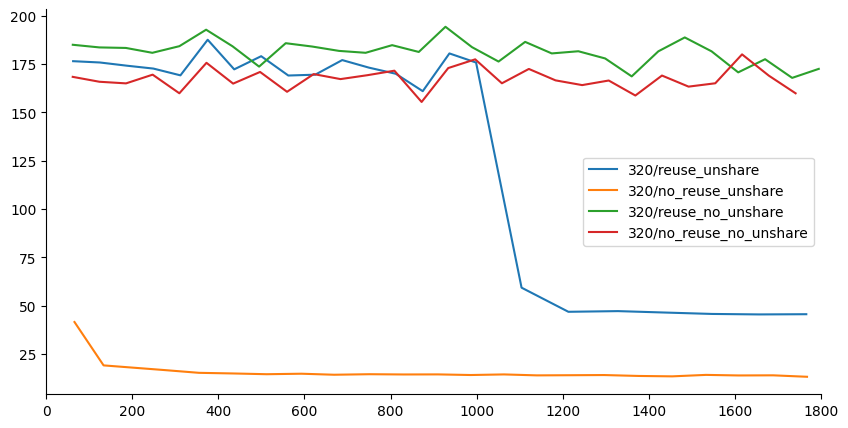

In [42]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))

plot2("320/reuse_unshare.txt", ax=ax)
plot2("320/no_reuse_unshare.txt", ax=ax)
plot2("320/reuse_no_unshare.txt", ax=ax)
plot2("320/no_reuse_no_unshare.txt", ax=ax)

ax.set_xlim(0, 30*60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

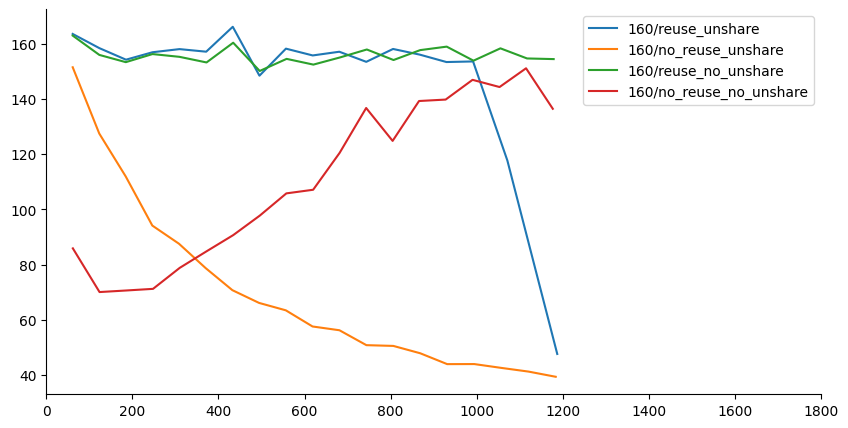

In [43]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))

plot2("160/reuse_unshare.txt", ax=ax)
plot2("160/no_reuse_unshare.txt", ax=ax)
plot2("160/reuse_no_unshare.txt", ax=ax)
plot2("160/no_reuse_no_unshare.txt", ax=ax)

ax.set_xlim(0, 30*60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

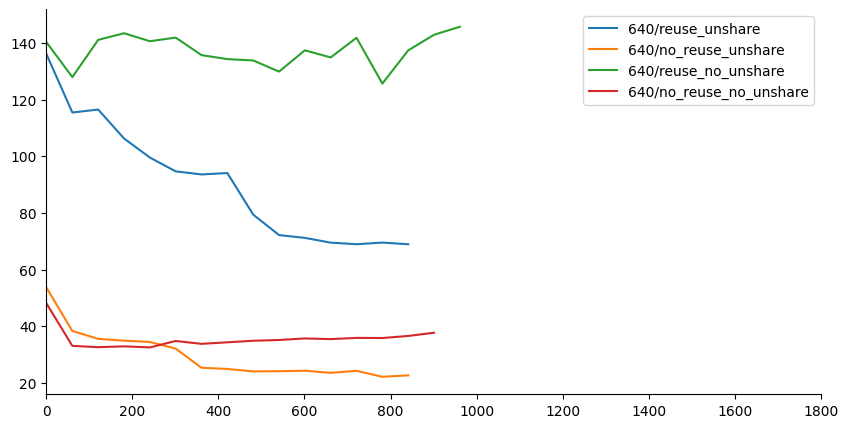

In [44]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))

plot("640/reuse_unshare.txt", ax=ax)
plot("640/no_reuse_unshare.txt", ax=ax)
plot("640/reuse_no_unshare.txt", ax=ax)
plot("640/no_reuse_no_unshare.txt", ax=ax)

ax.set_xlim(0, 30*60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)